In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from scipy.stats import skew
import spacy
#import swifter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('MIMIC-IV-dataset-final.csv')
data.shape

(6378, 233)

In [3]:
data.head()

subject_id gender  age  mortality                 ethnicity  Heart Rate  \
0    10002430      M   86          0                     WHITE         103   
1    10004401      M   82          1                     WHITE         104   
2    10004606      F   64          0                     WHITE         116   
3    10005348      M   76          0                     WHITE         103   
4    10010058      M   80          1  ASIAN - SOUTH EAST ASIAN         155   

   Heart rate Alarm - High  Heart Rate Alarm - Low  \
0                    140.0                    60.0   
1                    120.0                    60.0   
2                    130.0                   130.0   
3                    160.0                    85.0   
4                    130.0                    50.0   

   Arterial Blood Pressure systolic  Non Invasive Blood Pressure systolic  \
0                               NaN                                 126.0   
1                             150.0                                 166.0   
2                             210.0                                 204.0   
3                             138.0                                 157.0   
4                             118.0                                 121.0   

   ...  Sedative, hypnotic or anxiolytic use, unspecified with sedative  \
0  ...                                                  0                 
1  ...                                                  0                 
2  ...                                                  0                 
3  ...                                                  0                 
4  ...                                                  0                 

   Inhalant abuse with inhalant-induced dementia  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Inhalant dependence with inhalant-induced dementia  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Inhalant use, unspecified with inhalant-induced persisting deme  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance abuse with psychoactive substance-  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance dependence with psychoactive subst  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance use, unspecified with psychoactive  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                         

Columns with more than 30% missing values:
Arterial Blood Pressure systolic: 38.85%
Manual Blood Pressure Systolic Left: 96.52%
Manual Blood Pressure Systolic Right: 96.53%
Arterial Blood Pressure diastolic: 38.84%
Manual Blood Pressure Diastolic Left: 96.60%
Manual Blood Pressure Diastolic Right: 96.66%
Respiratory Rate (Set): 38.74%
Respiratory Rate (spontaneous): 36.06%
Respiratory Rate (Total): 35.86%
Forehead SpO2 Sensor in Place: 99.89%
INR: 3.70%
Prothrombin time: 3.70%
APS: 100.00%
CreatinineApacheIIScore: 99.97%
CreatinineApacheIIValue: 99.98%
Creatinine_ApacheIV: 100.00%
Creatinine (whole blood): 98.98%
Temperature: 60.21%
Potassium, Whole Blood: 100.00%
Potassium, Whole Blood-2: 22.59%
Potassium (whole blood): 43.95%
Sodium (whole blood): 52.73%
Sodium, Whole Blood: 33.25%
Sodium, Whole Blood-2: 100.00%
Chloride, Whole Blood: 35.54%
Chloride, Whole Blood-2: 100.00%
Chloride (whole blood): 55.97%
Chloride (whole blood) (soft): 100.00%
Glucose, Whole Blood: 100.00%
Glucose (wh

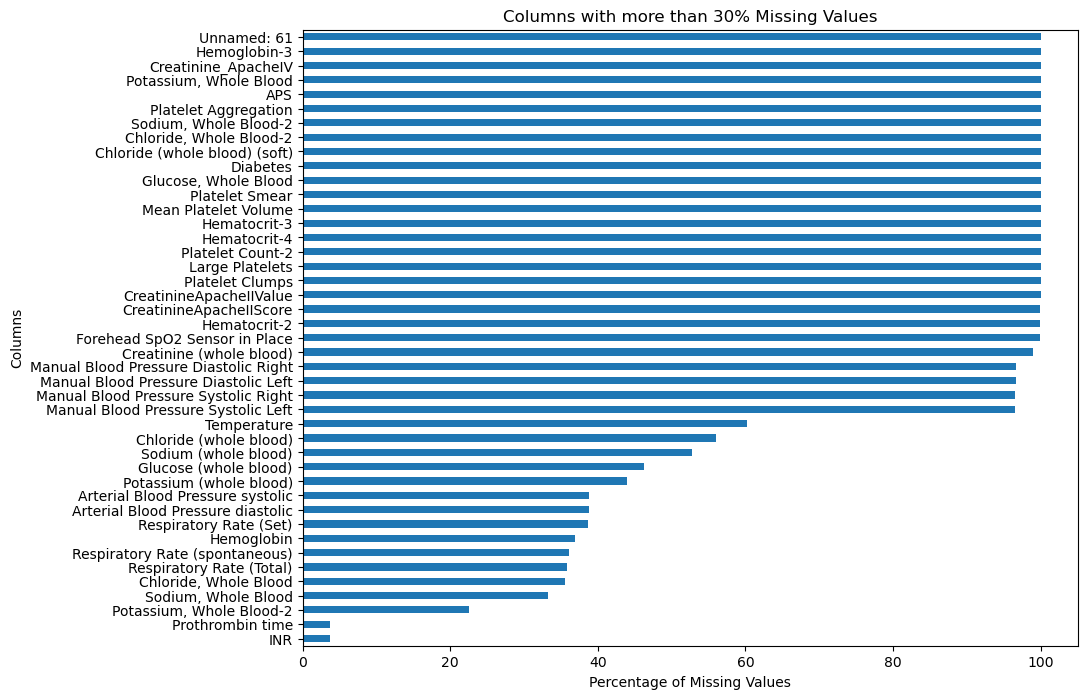

In [69]:

# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().sum() * 100 / len(data)

# Filter columns that have more than 30% missing values
major_missing_columns = missing_percentage[missing_percentage > 3].index.tolist()

# Print the columns with major missing values and their missing percentage
print("Columns with more than 30% missing values:")
for column in major_missing_columns:
    print(f"{column}: {missing_percentage[column]:.2f}%")

# We can also visualize this information for better understanding

plt.figure(figsize=(10, 8))
missing_percentage[major_missing_columns].sort_values().plot(kind='barh')
plt.title('Columns with more than 30% Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()


As we see these columns above have more than 80% missing values, we want to drop them.

In [66]:
# Remove these columns from the DataFrame
data_cleaned = data.drop(columns=major_missing_columns)

<Axes: >

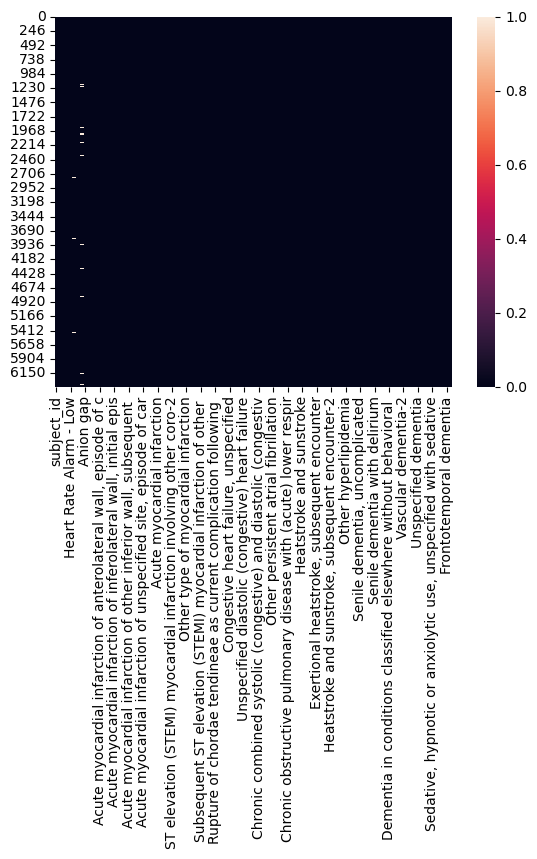

In [67]:
#also let's look at the heat map for futher confirmation.
sns.heatmap(data_cleaned.isnull())

In [70]:
data_cleaned.shape

(6378, 192)

In [38]:
display(data_cleaned.head())

subject_id gender  age  mortality                 ethnicity  Heart Rate  \
0    10002430      M   86          0                     WHITE         103   
1    10004401      M   82          1                     WHITE         104   
2    10004606      F   64          0                     WHITE         116   
3    10005348      M   76          0                     WHITE         103   
4    10010058      M   80          1  ASIAN - SOUTH EAST ASIAN         155   

   Heart rate Alarm - High  Heart Rate Alarm - Low  \
0                    140.0                    60.0   
1                    120.0                    60.0   
2                    130.0                   130.0   
3                    160.0                    85.0   
4                    130.0                    50.0   

   Arterial Blood Pressure systolic  Non Invasive Blood Pressure systolic  \
0                               NaN                                 126.0   
1                             150.0                                 166.0   
2                             210.0                                 204.0   
3                             138.0                                 157.0   
4                             118.0                                 121.0   

   ...  Sedative, hypnotic or anxiolytic use, unspecified with sedative  \
0  ...                                                  0                 
1  ...                                                  0                 
2  ...                                                  0                 
3  ...                                                  0                 
4  ...                                                  0                 

   Inhalant abuse with inhalant-induced dementia  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Inhalant dependence with inhalant-induced dementia  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   Inhalant use, unspecified with inhalant-induced persisting deme  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance abuse with psychoactive substance-  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance dependence with psychoactive subst  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Other psychoactive substance use, unspecified with psychoactive  \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                         

In [32]:
data_cleaned.dtypes


subject_id                                                          int64
gender                                                             object
age                                                                 int64
mortality                                                           int64
ethnicity                                                          object
                                                                    ...  
Other psychoactive substance dependence with psychoactive subst     int64
Other psychoactive substance use, unspecified with psychoactive     int64
Frontotemporal dementia                                             int64
Other frontotemporal dementia-2                                     int64
Dementia with Lewy bodies                                           int64
Length: 206, dtype: object

In [33]:
# Create a list for object columns
object_columns = []

# Iterate through columns and identify object columns
for column in data_cleaned.columns:
    if data[column].dtype == 'object':
        object_columns.append(column)

# Display the number of object columns and their names
print("Number of Object Columns:", len(object_columns))
print("\nObject Columns:", object_columns)


Number of Object Columns: 2

Object Columns: ['gender', 'ethnicity']


In [34]:
# Summary statistics
data_cleaned.describe()

subject_id          age    mortality   Heart Rate  \
count  6.378000e+03  6378.000000  6378.000000  6378.000000   
mean   1.497557e+07    69.314048     0.152085   113.948103   
std    2.867246e+06    13.153405     0.359132    70.692548   
min    1.000243e+07    19.000000     0.000000    43.000000   
25%    1.249481e+07    61.000000     0.000000    95.000000   
50%    1.495486e+07    70.000000     0.000000   109.000000   
75%    1.743855e+07    79.000000     0.000000   128.000000   
max    1.999729e+07    91.000000     1.000000  5409.000000   

       Heart rate Alarm - High  Heart Rate Alarm - Low  \
count              6375.000000             6374.000000   
mean                260.767059              168.791669   
std                3955.494709             2387.917312   
min                  60.000000               40.000000   
25%                 120.000000               50.000000   
50%                 130.000000               60.000000   
75%                 132.500000               60.000000   
max              165130.000000            60120.000000   

       Arterial Blood Pressure systolic  Non Invasive Blood Pressure systolic  \
count                       3900.000000                           6333.000000   
mean                         154.512821                            160.850941   
std                           29.237310                            294.837994   
min                            0.000000                             56.000000   
25%                          136.000000                            135.000000   
50%                          150.000000                            153.000000   
75%                          168.000000                            171.000000   
max                          742.000000                          15878.000000   

       Arterial Blood Pressure diastolic  \
count                        3901.000000   
mean                          174.717765   
std                          2312.116375   
min                             1.000000   
25%                            69.000000   
50%                            78.000000   
75%                            92.000000   
max                         91100.000000   

       Non Invasive Blood Pressure diastolic  ...  \
count                            6333.000000  ...   
mean                              215.872730  ...   
std                              2786.017948  ...   
min                                41.000000  ...   
25%                                82.000000  ...   
50%                                98.000000  ...   
75%                               115.000000  ...   
max                            105125.000000  ...   

       Sedative, hypnotic or anxiolytic use, unspecified with sedative  \
count                                             6378.0                 
mean                                                 0.0                 
std                                                  0.0                 
min                                                  0.0                 
25%                                                  0.0                 
50%                                                  0.0                 
75%                                                  0.0                 
max                                                  0.0                 

       Inhalant abuse with inhalant-induced dementia  \
count                                         6378.0   
mean                                             0.0   
std                                              0.0   
min                                              0.0   
25%                                              0.0   
50%                                              0.0   
75%                                              0.0   
max                                              0.0   

       Inhalant dependence with inhalant-induced dementia  \
count                                             6378.0    
mean                        

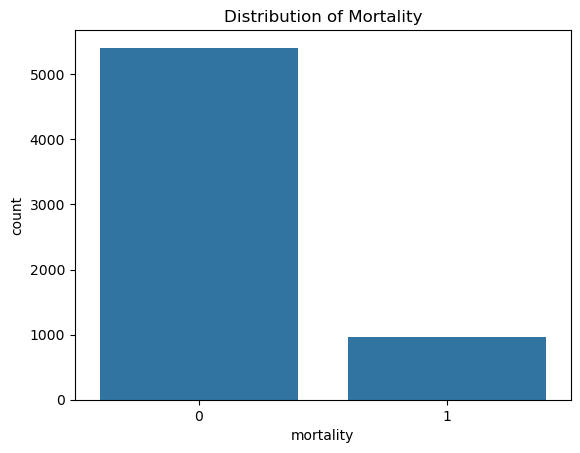

In [39]:
# Distribution of the target variable 'mortality'
sns.countplot(x='mortality', data=data_cleaned)
plt.title('Distribution of Mortality')
plt.show()

From the graph, we can see that the majority of the patients in the dataset have a 'mortality' value of 0, indicating they survived, while a much smaller portion of the patients have a 'mortality' value of 1, signifying they did not survive. The substantial difference in height between the two bars suggests an imbalanced class distribution within the dataset. This disproportion highlights that within this particular dataset, the number of survivors far exceeds the number of non-survivors. 

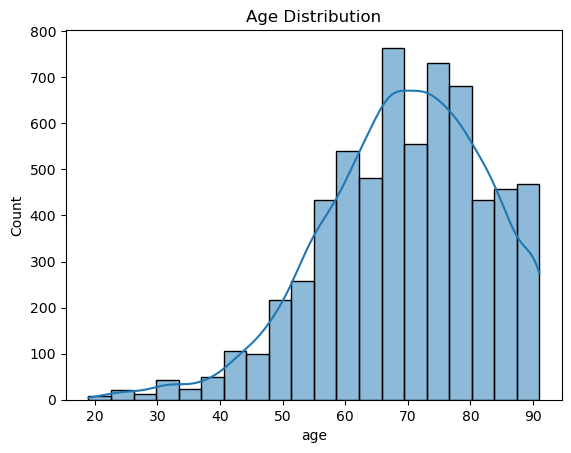

In [40]:
# Age distribution
sns.histplot(data_cleaned['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

The histogram shows that the dataset includes a wide range of ages, with the most common age groups appearing to be between 60 and 80 years old, as indicated by the tallest bars. There are fewer young patients (ages 20-40) and a noticeable decline in the number of patients over 80 years old. The KDE curve, which provides a smoothed version of the histogram, suggests a distribution with a peak around the 60-70 age range, hinting at a concentration of patients in the older age spectrum.

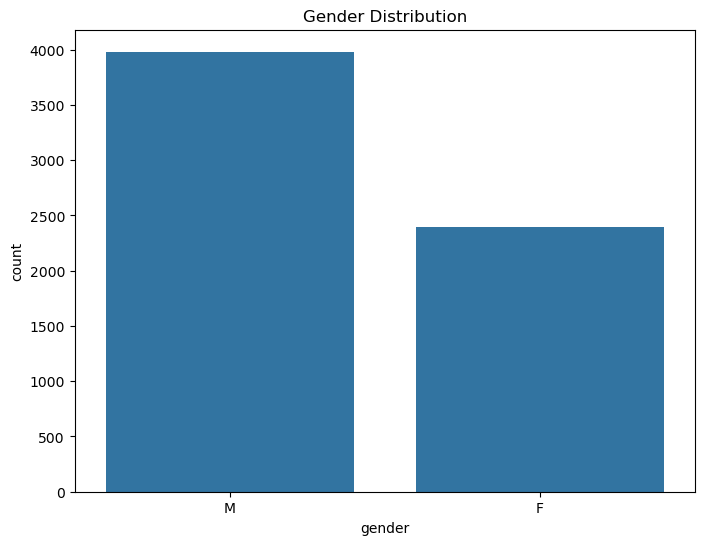

Gender Distribution:
gender
M    3982
F    2396
Name: count, dtype: int64


In [41]:
# Check the unique values in the 'gender' column
gender_distribution = data_cleaned['gender'].value_counts()

# Plot the gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data_cleaned)
plt.title('Gender Distribution')
plt.show()

# Display the gender distribution
print("Gender Distribution:")
print(gender_distribution)

From the bar chart and the output above, it is evident that there are more male patients (3,982) than female patients (2,396) within the dataset.

In [47]:
# Check the unique values in the 'ethnicity' column
ethnicity_distribution = data_cleaned['ethnicity'].value_counts()

# Plot the ethnicity distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='ethnicity', data=data_cleaned)
plt.title('Ethnicity Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Display the ethnicity distribution
print("Ethnicity Distribution:")
print(ethnicity_distribution)

Ethnicity Distribution:
ethnicity
WHITE                                        4264
UNKNOWN                                       693
BLACK/AFRICAN AMERICAN                        428
OTHER                                         180
WHITE - OTHER EUROPEAN                        165
WHITE - RUSSIAN                               102
HISPANIC/LATINO - PUERTO RICAN                 77
ASIAN - CHINESE                                64
ASIAN                                          51
UNABLE TO OBTAIN                               50
HISPANIC/LATINO - DOMINICAN                    40
PATIENT DECLINED TO ANSWER                     39
BLACK/CARIBBEAN ISLAND                         30
BLACK/CAPE VERDEAN                             22
WHITE - EASTERN EUROPEAN                       21
HISPANIC OR LATINO                             19
PORTUGUESE                                     17
ASIAN - ASIAN INDIAN                           17
BLACK/AFRICAN                                  17
ASIAN - SOUTH EA

The "Ethnicity Distribution" graph presents the count of patients across various ethnic groups within the dataset. The most represented ethnicity is 'WHITE', with a significantly higher count compared to other categories, followed by 'UNKNOWN' and 'BLACK/AFRICAN AMERICAN'. The counts for other ethnic groups are substantially lower, with some groups represented by only a handful of patients. This bar chart underscores the ethnic diversity within the patient population, though it also highlights a predominant representation of the 'WHITE' category.

In [44]:
# Specifying unwanted columns
unwanted_columns = ['subject_id', 'gender', 'age', 'mortality', 'ethnicity']

# Exclude unwanted columns
selected_columns = [col for col in data_cleaned.columns if col not in unwanted_columns]
selected_data = data_cleaned[selected_columns]

# Visualize the correlation matrix
correlation_matrix = selected_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Since, we cannot extract a clear correlation details from the above figure, we try to manually find top five positive and negative correlations.

In [45]:
# Flatten the correlation matrix to get pairs of variables and their correlation coefficient
corr_pairs = correlation_matrix.unstack()

# Remove self-correlation (diagonal elements of the matrix)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Separate positive and negative correlations
positive_corr_pairs = corr_pairs[corr_pairs > 0].sort_values(ascending=False)
negative_corr_pairs = corr_pairs[corr_pairs < 0].sort_values()

# Get the top 5 positive correlations
top_5_positive = positive_corr_pairs.head(5)
# Get the top 5 negative correlations
top_5_negative = negative_corr_pairs.head(5)

print("Top 5 Positive Correlations:")
print(top_5_positive)

print("\nTop 5 Negative Correlations:")
print(top_5_negative)


Top 5 Positive Correlations:
Chronic obstructive pulmonary disease, unspecified                 Chronic obstructive pulmonary disease, unspecified-2                 1.0
Chronic obstructive pulmonary disease with (acute) exacerbation    Chronic obstructive pulmonary disease with (acute) exacerbation-2    1.0
Chronic obstructive pulmonary disease, unspecified-2               Chronic obstructive pulmonary disease, unspecified                   1.0
Chronic obstructive pulmonary disease with (acute) exacerbation-2  Chronic obstructive pulmonary disease with (acute) exacerbation      1.0
Chronic obstructive pulmonary disease with (acute) lower respir-2  Chronic obstructive pulmonary disease with (acute) lower respir      1.0
dtype: float64

Top 5 Negative Correlations:
Chloride, Whole Blood        Bicarbonate                             -0.220984
Bicarbonate                  Chloride, Whole Blood                   -0.220984
Hyperlipidemia, unspecified  Atrial fibrillation                    

From the above output, we can see that the top five positive correlations involve variables related to chronic obstructive pulmonary disease (COPD), with a perfect correlation coefficient of 1.0. This likely indicates redundant or duplicate variables within the dataset, as it's unusual for distinct variables to have a perfect correlation unless they are essentially measuring the same underlying attribute.

On the other hand, the top five negative correlations display inverse relationships between different clinical measurements and conditions. For instance, 'Chloride, Whole Blood' and 'Bicarbonate' show the strongest negative correlation, suggesting that as chloride levels in the whole blood increase, bicarbonate levels tend to decrease, or vice versa. Similarly, the negative correlation between 'Hyperlipidemia, unspecified' and both 'Atrial fibrillation' and 'Congestive heart failure, unspecified' indicates that patients with unspecified hyperlipidemia are less likely to have recorded instances of atrial fibrillation or congestive heart failure. 

In [46]:
# Statistics for Heart Rate
heart_rate_stats = data_cleaned['Heart Rate'].describe()
print(heart_rate_stats)


count    6378.000000
mean      113.948103
std        70.692548
min        43.000000
25%        95.000000
50%       109.000000
75%       128.000000
max      5409.000000
Name: Heart Rate, dtype: float64


Since there is extreme value in heart rate, let's try to deal with them first. So, we will take threshold range and move forward with EDA.

In [49]:

# As 'Heart Rate' is the column with extreme values
threshold = data_cleaned['Heart Rate'].mean() + 3 * data_cleaned['Heart Rate'].std()

# Filter out extreme values
filtered_data = data_cleaned[data_cleaned['Heart Rate'] <= threshold]

# Plot the histogram for the filtered data
filtered_data['Heart Rate'].hist()
plt.title('Filtered Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()


The graph above displays a histogram of heart rate measurements after filtering out extreme values. 

A threshold was set at the mean plus three standard deviations of the 'Heart Rate' data, a common criterion for identifying outliers.

The histogram shows the frequency of different heart rate measurements within this threshold. The most frequent heart rate values fall within a range that appears to be between 60 and 120 beats per minute, which is typical for a resting adult population. The distribution of heart rates has a right-skewed shape, indicating that there are fewer instances of higher heart rates within the non-extreme data.

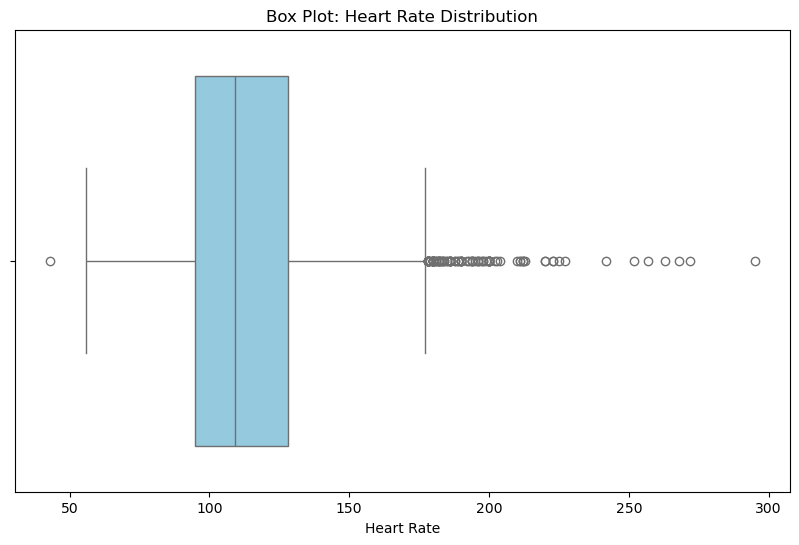

In [50]:
# Box plot for Heart Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['Heart Rate'], color='skyblue')
plt.title('Box Plot: Heart Rate Distribution')
plt.xlabel('Heart Rate')
plt.show()


The plot shows a concentration of heart rate values around the median, with a number of outliers on both the lower and higher ends, indicating instances of unusually low or high heart rates compared to the rest of the data. This is particularly useful for detecting outliers and understanding the variability of heart rate measurements across the patient population.

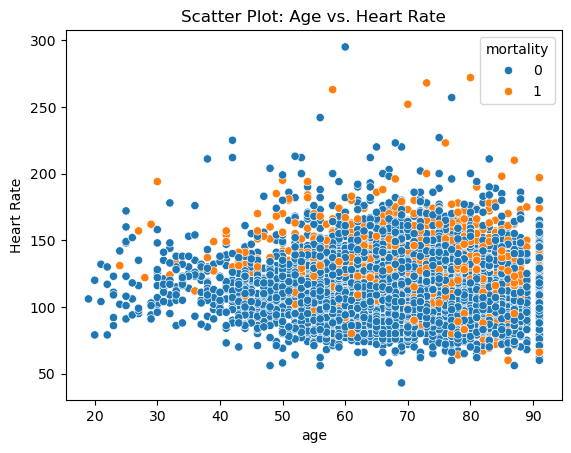

In [51]:
# Scatter plot for Heart Rate and Age
sns.scatterplot(x='age', y='Heart Rate', hue='mortality', data=filtered_data)
plt.title('Scatter Plot: Age vs. Heart Rate')
plt.show()

The "Scatter Plot: Age vs. Heart Rate" shows heart rate data across different ages, colored by mortality status, with no apparent strong trend between age and heart rate. The plot does not indicate a clear differentiation in mortality based on heart rate or age alone, highlighting the complex nature of clinical outcomes.

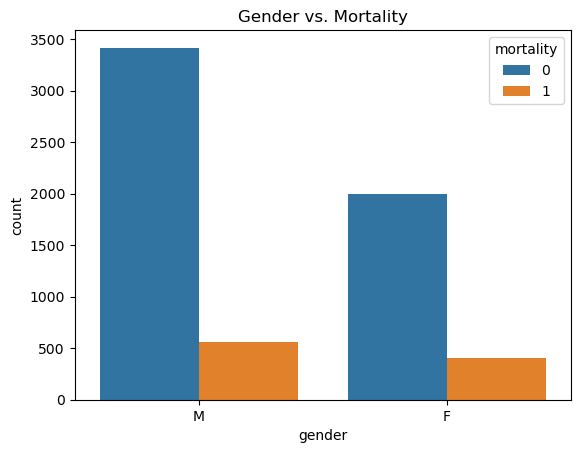

In [52]:
# Bar plot for Gender and Mortality
sns.countplot(x='gender', hue='mortality', data=filtered_data)
plt.title('Gender vs. Mortality')
plt.show()


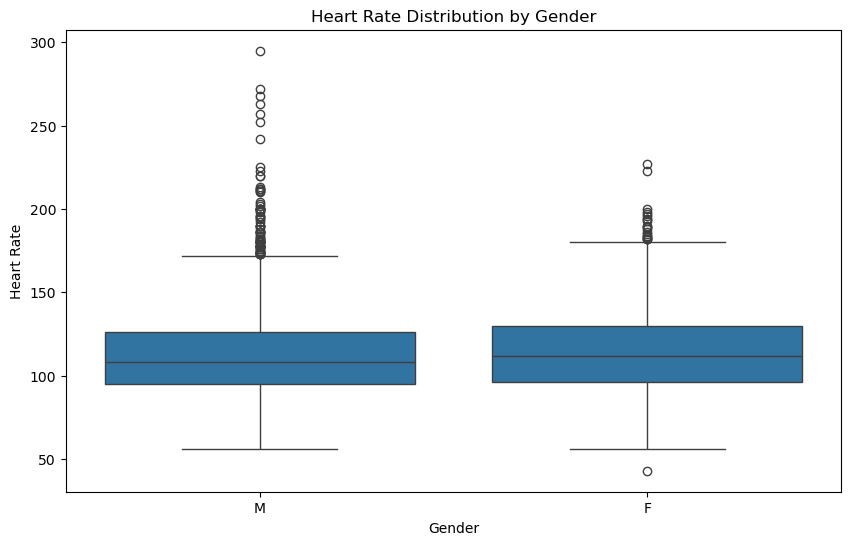

In [58]:
#Distribution of Heart Rate by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='Heart Rate', data=filtered_data)
plt.title('Heart Rate Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Heart Rate')
plt.show()


From the above grpah, there appears to be a higher count of male patients compared to female patients overall, and this pattern persists within each mortality status category. The chart suggests that within this dataset, gender distribution is skewed towards males, and the mortality rate follows a similar distribution across genders.

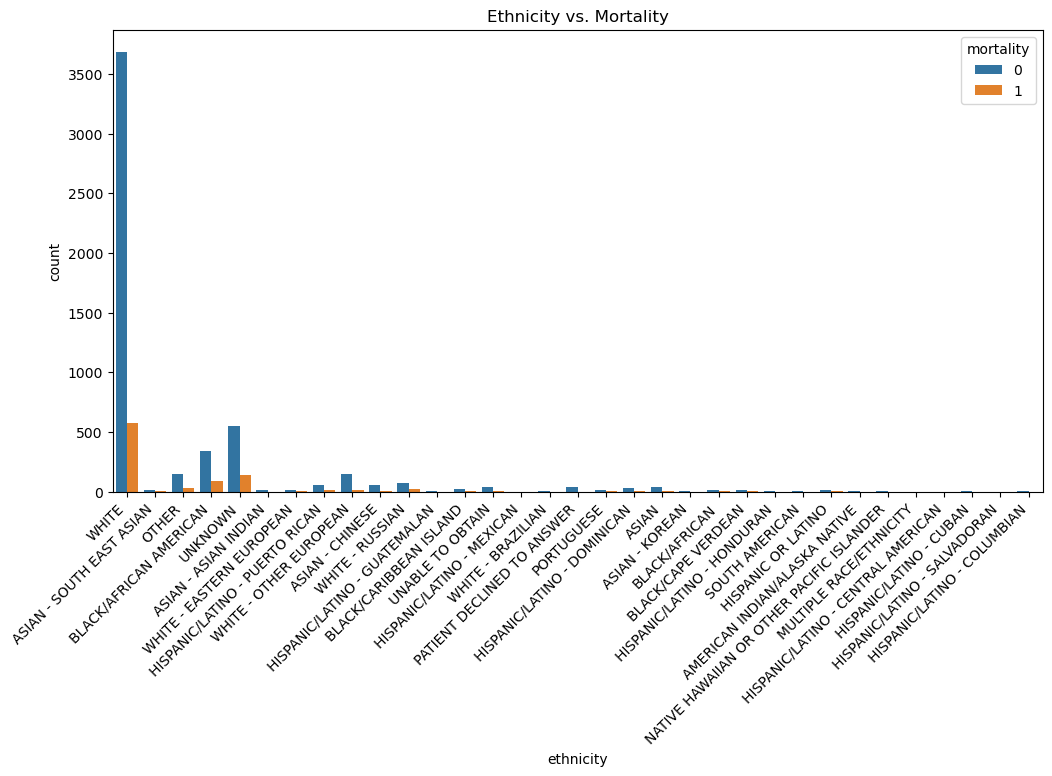

In [53]:
# Bar plot for Ethnicity and Mortality
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', hue='mortality', data=filtered_data)
plt.title('Ethnicity vs. Mortality')
plt.xticks(rotation=45, ha='right')
plt.show()


The "Ethnicity vs. Mortality" bar chart shows the distribution of mortality across different ethnic groups. The blue bars represent the count of patients who survived (mortality '0'), and the orange bars indicate those who did not survive (mortality '1'). The 'WHITE' ethnic group has the highest count, showing a significant number of patients, followed by a much smaller representation from other ethnic groups. 

Mortality counts across these ethnicities also reflect this trend, with the majority of non-survival cases occurring within the 'WHITE' group, which is consistent with their larger population in the dataset. This visualization indicates that the dataset may not be ethnically diverse, and mortality distribution appears to align proportionally with the population size of each ethnic group.

/var/folders/gb/5rj8_9z160jfqmdmrkh2bkc00000gn/T/ipykernel_43912/2235002466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age Group'] = pd.cut(filtered_data['age'], bins=age_bins, labels=age_labels)


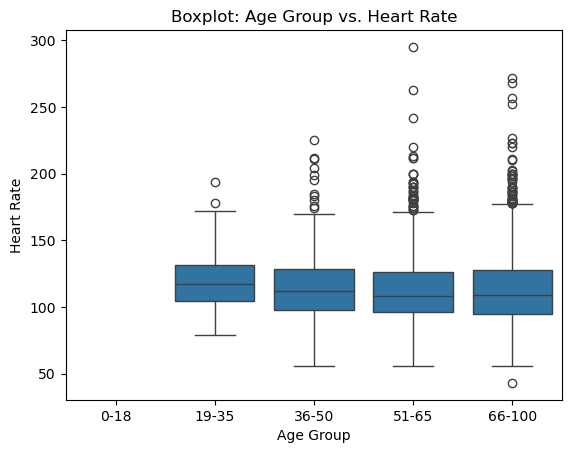

In [55]:
# Define age bins and labels
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-100']

# Create 'Age Group' column
filtered_data['Age Group'] = pd.cut(filtered_data['age'], bins=age_bins, labels=age_labels)

# Boxplot
sns.boxplot(x='Age Group', y='Heart Rate', data=filtered_data)
plt.title('Boxplot: Age Group vs. Heart Rate')
plt.show()


The "Boxplot: Age Group vs. Heart Rate" graph compares heart rate distributions across different age categories. The box plots reveal that median heart rates are fairly consistent across age groups, but there's a noticeable increase in variability (as indicated by the size of the boxes and the range of the whiskers) as age increases. Outliers, shown as individual points, are present in all age groups, with the **oldest group (66-100) having a wider spread of outliers, suggesting more variability in heart rate within this group.** 

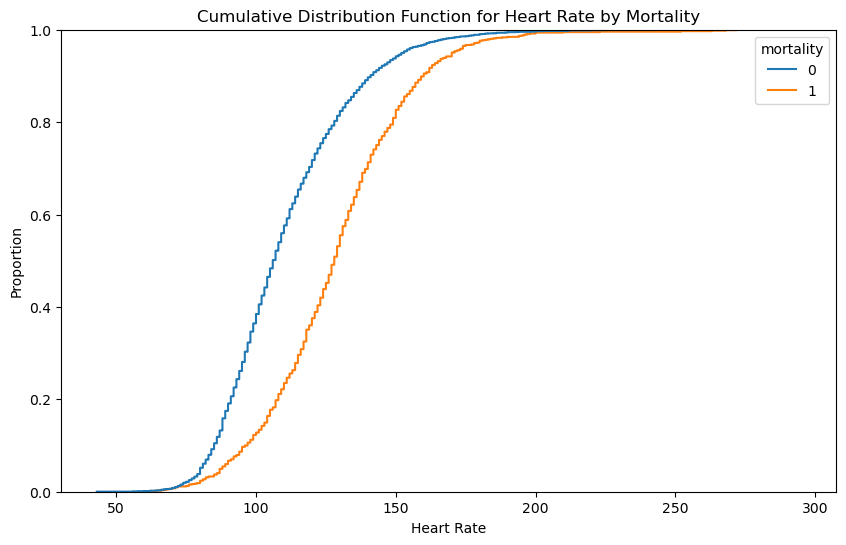

In [56]:
#CDG of Heart Rate by Mortality
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=filtered_data, x='Heart Rate', hue='mortality')
plt.title('Cumulative Distribution Function for Heart Rate by Mortality')
plt.show()


The "Cumulative Distribution Function for Heart Rate by Mortality" graph shows the proportion of patients at or below a given heart rate, differentiated by mortality status. The orange line represents patients who did not survive (mortality '1'), and the blue line represents those who did (mortality '0'). Both lines ascend as heart rate increases, but they diverge at higher heart rates, **suggesting that higher heart rates are more commonly associated with non-survival.** 

The "Heart Rate Distribution by Gender" boxplot provides a comparison of heart rate distributions between male (M) and female (F) patients. Both genders show a wide range of heart rates with numerous outliers, indicated by points beyond the whiskers. The median heart rate for each gender, marked by the line in the middle of each box, appears to be roughly similar. However, males have a slightly higher spread of values, as indicated by the longer whiskers and box size, compared to females. 

In [60]:
#let's save this filtered dataset into a new dataset for our furhter use.
#filtered_data.to_csv('MIMIC-IV-dataset-finalized.csv', index=False)


In [17]:
# Load the dataset
finalized_data = pd.read_csv("MIMIC-IV-dataset-finalized V2.csv")

# Display the first few rows of the dataset
finalized_data.head()

subject_id gender  age  mortality                 ethnicity  Heart Rate  \
0    10002430      M   86          0                     WHITE         103   
1    10004401      M   82          1                     WHITE         104   
2    10004606      F   64          0                     WHITE         116   
3    10005348      M   76          0                     WHITE         103   
4    10010058      M   80          1  ASIAN - SOUTH EAST ASIAN         155   

   Arterial Blood Pressure systolic  Non Invasive Blood Pressure systolic  \
0                               NaN                                 126.0   
1                             150.0                                 166.0   
2                             210.0                                 204.0   
3                             138.0                                 157.0   
4                             118.0                                 121.0   

   Arterial Blood Pressure diastolic  Non Invasive Blood Pressure diastolic  \
0                                NaN                                   91.0   
1                              104.0                                  154.0   
2                               65.0                                  161.0   
3                               62.0                                   88.0   
4                               89.0                                   88.0   

   ...  Chronic obstructive pulmonary disease with (acute) exacerbation  \
0  ...                                                  0                 
1  ...                                                  0                 
2  ...                                                  0                 
3  ...                                                  0                 
4  ...                                                  0                 

   Chronic obstructive pulmonary disease, unspecified  \
0                                                  1    
1                                                  0    
2                                                  1    
3                                                  0    
4                                                  0    

   Family history of stroke (cerebrovascular)  Family history of stroke  \
0                                           0                         0   
1                                           0                         0   
2                                           0                         0   
3                                           0                         0   
4                                           0                         0   

   Other and unspecified hyperlipidemia  Hyperlipidemia, unspecified  \
0                                     0                            1   
1                                     0                            0   
2                                     0                            1   
3                                     1                            0   
4                                     0                            1   

   Dementia in conditions classified elsewhere without behavioral   \
0                                                  0                 
1                                                  0                 
2                                                  0                 
3                                                  0                 
4                                                  0                 

   Dementia, unspecified, without behavioral disturbance  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Unspecified dementia without behavioral disturbance  Age Group  
0                                                  0       66-100  


# Combining Related Variables in MIMIC-IV Dataset

This notebook outlines the steps for combining related variables in the MIMIC-IV dataset. 
The goal is to ensure that the combination method is both clinically appropriate and statistically sound.


## 1. Blood Pressure Measurements

### Explanation
Prefer arterial measurements over non-invasive if both are available, as arterial measurements are generally more accurate and considered the gold standard in critically ill patients. If only non-invasive measurements are available, use those.

### Code

In [18]:
# Assume arterial measurements are NaN if not available
finalized_data['Preferred Systolic BP'] = finalized_data['Arterial Blood Pressure systolic'].fillna(finalized_data['Non Invasive Blood Pressure systolic'])
finalized_data['Preferred Diastolic BP'] = finalized_data['Arterial Blood Pressure diastolic'].fillna(finalized_data['Non Invasive Blood Pressure diastolic'])


## 2. Respiratory Rates

### Explanation
Use the highest value among the measurements, as the highest respiratory rate could indicate the most stressed physiological condition that might require clinical attention.

### Code

In [19]:
finalized_data['Max Respiratory Rate'] = finalized_data[['Respiratory Rate', 'Respiratory Rate (Set)', 'Respiratory Rate (spontaneous)', 'Respiratory Rate (Total)']].max(axis=1)


## 3. Potassium Levels

### Explanation
Average the measurements, assuming they are clinically equivalent and taken close together in time. Potassium levels can fluctuate, so averaging provides a stable estimate.

### Code

In [20]:
finalized_data['Average Potassium Level'] = finalized_data[['Potassium, Whole Blood-2', 'Potassium (whole blood)']].mean(axis=1)


## 4. Heart Failure Variables

### Explanation
Create a binary indicator for the presence of any heart failure condition. This approach simplifies analysis without losing important information on heart failure presence.

### Code

In [21]:
# List of heart failure-related variables
heart_failure_columns = [
    'Congestive heart failure, unspecified', 'Unspecified systolic (congestive) heart failure',
    'Acute systolic (congestive) heart failure', 'Chronic systolic (congestive) heart failure',
    'Acute on chronic systolic (congestive) heart failure', 'Unspecified diastolic (congestive) heart failure',
    'Chronic diastolic (congestive) heart failure', 'Acute on chronic diastolic (congestive) heart failure'
]

# Create a combined heart failure variable
finalized_data['Any Heart Failure'] = finalized_data[heart_failure_columns].max(axis=1)


## 5.Atrial Fibrillation Variables

### Explanation

Create a binary indicator for the presence of any atrial fibrillation condition. This simplifies the dataset by consolidating various forms of atrial fibrillation into a single column, which can be useful for analyses that don't require differentiation between the types of atrial fibrillation but rather the presence or absence of the condition.

### Code


In [22]:
# List of atrial fibrillation-related variables
atrial_fibrillation_columns = [
    'Atrial fibrillation', 'Paroxysmal atrial fibrillation',
    'Persistent atrial fibrillation', 'Chronic atrial fibrillation',
    'Unspecified atrial fibrillation'
]

# Create a combined atrial fibrillation variable
finalized_data['Any Atrial Fibrillation'] = finalized_data[atrial_fibrillation_columns].max(axis=1)


## 6. Dementia Variables

### Explanation

Consolidate various dementia columns into a single binary indicator column for the presence of dementia. This approach is useful for studies focusing on the impact of dementia as a general condition, without needing to distinguish between different types or specifications of dementia in the initial analyses.

### Code

In [23]:
# Correcting the list of dementia-related variables to match the DataFrame
dementia_columns = [
    'Dementia in conditions classified elsewhere without behavioral ',  # Corrected
    'Dementia, unspecified, without behavioral disturbance',
    'Unspecified dementia without behavioral disturbance'
]

# Create a combined dementia variable
finalized_data['Any Dementia'] = finalized_data[dementia_columns].max(axis=1)


## 7. Myocardial Infarction Variables

### Explanation

Combine columns related to myocardial infarction (MI) into a single binary indicator to identify any presence of MI. This is particularly useful for cardiovascular research or studies where the focus is on the presence of MI as a factor rather than the specific type of MI.

### Code

In [24]:
# List of myocardial infarction-related variables
myocardial_infarction_columns = [
    'Old myocardial infarction', 'Non-ST elevation (NSTEMI) myocardial infarction',
    'Myocardial infarction type 2', 'Old myocardial infarction-2'
]

# Create a combined myocardial infarction variable
finalized_data['Any Myocardial Infarction'] = finalized_data[myocardial_infarction_columns].max(axis=1)


## Removing Unwanted Columns

In [28]:
# Initial columns to drop
columns_to_drop = [
    'Arterial Blood Pressure systolic', 'Non Invasive Blood Pressure systolic',
    'Arterial Blood Pressure diastolic', 'Non Invasive Blood Pressure diastolic',
    'Respiratory Rate', 'Respiratory Rate (Set)', 'Respiratory Rate (spontaneous)', 'Respiratory Rate (Total)',
    'Potassium, Whole Blood-2', 'Potassium (whole blood)'
]

# Extending the list with atrial fibrillation and myocardial infarction columns
additional_columns_to_drop = [
    'Atrial fibrillation', 'Paroxysmal atrial fibrillation',
    'Persistent atrial fibrillation', 'Chronic atrial fibrillation',
    'Unspecified atrial fibrillation',
    'Old myocardial infarction', 'Non-ST elevation (NSTEMI) myocardial infarction',
    'Myocardial infarction type 2', 'Old myocardial infarction-2'
]

# Correcting the dementia-related column names based on your DataFrame
corrected_dementia_columns = [
    'Dementia in conditions classified elsewhere without behavioral ',  # Corrected name
    'Dementia, unspecified, without behavioral disturbance',
    'Unspecified dementia without behavioral disturbance'
]

# Combine the lists of columns to drop
columns_to_drop.extend(additional_columns_to_drop + corrected_dementia_columns)

# Heart failure-related variables to drop
heart_failure_columns = [
    'Congestive heart failure, unspecified', 'Unspecified systolic (congestive) heart failure',
    'Acute systolic (congestive) heart failure', 'Chronic systolic (congestive) heart failure',
    'Acute on chronic systolic (congestive) heart failure', 'Unspecified diastolic (congestive) heart failure',
    'Chronic diastolic (congestive) heart failure', 'Acute on chronic diastolic (congestive) heart failure'
]

# Combine all columns to drop (including heart failure columns) and drop them from the DataFrame
finalized_data.drop(columns_to_drop + heart_failure_columns, axis=1, inplace=True)


In [29]:
finalized_data.head()

subject_id gender  age  mortality                 ethnicity  Heart Rate  \
0    10002430      M   86          0                     WHITE         103   
1    10004401      M   82          1                     WHITE         104   
2    10004606      F   64          0                     WHITE         116   
3    10005348      M   76          0                     WHITE         103   
4    10010058      M   80          1  ASIAN - SOUTH EAST ASIAN         155   

   SpO2 Desat Limit  INR  Prothrombin time  Anion gap  ...  \
0              86.0  1.3              13.9       20.0  ...   
1             100.0  1.7              18.9       21.0  ...   
2              88.0  1.1              12.2       20.0  ...   
3              88.0  1.3              13.8       12.0  ...   
4              85.0  1.5              16.1       20.0  ...   

   Hyperlipidemia, unspecified  Age Group  Preferred Systolic BP  \
0                            1     66-100                  126.0   
1                            0     66-100                  150.0   
2                            1      51-65                  210.0   
3                            0     66-100                  138.0   
4                            1     66-100                  118.0   

   Preferred Diastolic BP  Max Respiratory Rate  Average Potassium Level  \
0                    91.0                  36.0                      NaN   
1                   104.0                  41.0                      5.1   
2                    65.0                  41.0                      4.5   
3                    62.0                  25.0                      5.7   
4                    89.0                  35.0                      7.1   

   Any Heart Failure  Any Atrial Fibrillation  Any Dementia  \
0                  1                        1             0   
1                  1                        1             0   
2                  0                        0             0   
3                  0                        1             0   
4                  1                        1             0   

   Any Myocardial Infarction  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 39 columns]

In [30]:
# Convert column names to a list and display them
column_names_list = finalized_data.columns.tolist()
print(column_names_list)


['subject_id', 'gender', 'age', 'mortality', 'ethnicity', 'Heart Rate', 'SpO2 Desat Limit', 'INR', 'Prothrombin time', 'Anion gap', 'Creatinine (serum)', 'Temperature', 'Sodium (whole blood)', 'Sodium, Whole Blood', 'Chloride, Whole Blood', 'Chloride (whole blood)', 'Bicarbonate', 'Glucose (whole blood)', 'GCS - Eye Opening', 'Hemoglobin', 'Hemoglobin-2', 'Hematocrit', 'Platelet Count', 'Acute on chronic combined systolic (congestive) and diastolic (', 'Chronic obstructive pulmonary disease with (acute) exacerbation', 'Chronic obstructive pulmonary disease, unspecified', 'Family history of stroke (cerebrovascular)', 'Family history of stroke', 'Other and unspecified hyperlipidemia', 'Hyperlipidemia, unspecified', 'Age Group', 'Preferred Systolic BP', 'Preferred Diastolic BP', 'Max Respiratory Rate', 'Average Potassium Level', 'Any Heart Failure', 'Any Atrial Fibrillation', 'Any Dementia', 'Any Myocardial Infarction']


In [31]:
# Save the DataFrame to a CSV file in the same directory as the Jupyter notebook
#finalized_data.to_csv('finalized_data_combined.csv', index=False)
